cnt_communication число отправленных коммуникаций о кэшбэках
cnt_view число просмотров предложений с кэшбэком за последние 3 месяца
cnt_activation число активированных предложений за последние 3 месяца

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t, norm
from scipy import stats as st

import plotly.express as px
import cufflinks as cf

from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [140]:
df = pd.read_csv('tinkoff_chashback.csv')
df

,client_id,cb_merch_last_3_month,cb_bank_last_3_month,cb_merch_before,cb_bank_before,cnt_communication,cnt_activation,cnt_view,Air,Beauty shop,...,Fastfood_before,Fuel_before,House_before,Jewelry_before,Other_before,Pet shop_before,Pharmacies_before,Supermarkets_before,Taxi_before,Transport_before
0,162353149,282.0,141.0,119.0,125.0,6,229,606,0.0,109.0,...,498.0,157.0,2621.0,31.0,6232.0,0.0,91.0,5356.0,0.0,119.0
1,666605735,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,2.0
2,558610079,0.0,0.0,0.0,0.0,0,51,77,2585.0,0.0,...,527.0,398.0,788.0,0.0,9797.0,0.0,1.0,371.0,0.0,458.0
3,769974329,174.0,0.0,151.0,102.0,3,137,375,0.0,0.0,...,227.0,0.0,0.0,0.0,208.0,0.0,14.0,338.0,0.0,10.0
4,350605405,0.0,0.0,179.0,179.0,4,18,24,0.0,634.0,...,452.0,372.0,0.0,76.0,486.0,0.0,499.0,2198.0,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,377949465,0.0,0.0,1275.0,1280.0,3,136,335,0.0,0.0,...,215.0,584.0,59.0,0.0,681.0,0.0,459.0,1034.0,0.0,0.0
49996,299560244,131.0,0.0,2.0,3.0,1,32,65,0.0,0.0,...,9.0,351.0,4.0,25.0,572.0,35.0,50.0,949.0,0.0,0.0
49997,66958117,448.0,0.0,0.0,0.0,1,209,507,14.0,0.0,...,80.0,26.0,0.0,0.0,423.0,0.0,22.0,1006.0,0.0,112.0
49998,549553108,0.0,0.0,244.0,244.0,3,14,21,0.0,66.0,...,653.0,34.0,6.0,0.0,5476.0,15.0,154.0,3715.0,0.0,155.0


In [141]:
df.columns

Index(['client_id', 'cb_merch_last_3_month', 'cb_bank_last_3_month',
       'cb_merch_before', 'cb_bank_before', 'cnt_communication',
       'cnt_activation', 'cnt_view', 'Air', 'Beauty shop', 'Book store',
       'Children', 'Cinema', 'Clothes', 'Electronics', 'Fastfood', 'Fuel',
       'House', 'Jewelry', 'Other', 'Pet shop', 'Pharmacies', 'Supermarkets',
       'Taxi', 'Transport', 'Air_before', 'Beauty shop_before',
       'Book store_before', 'Children_before', 'Cinema_before',
       'Clothes_before', 'Electronics_before', 'Fastfood_before',
       'Fuel_before', 'House_before', 'Jewelry_before', 'Other_before',
       'Pet shop_before', 'Pharmacies_before', 'Supermarkets_before',
       'Taxi_before', 'Transport_before'],
      dtype='object')

In [142]:
df = df.rename(columns={'Beauty shop':'Beauty_shop','Book store':'Book_store','Pet shop':'Pet_shop','Beauty shop_before':'Beauty_shop_before','Book store_before':'Book_store_before','Pet shop_before':'Pet_shop_before' })

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   client_id              50000 non-null  int64  
 1   cb_merch_last_3_month  50000 non-null  float64
 2   cb_bank_last_3_month   50000 non-null  float64
 3   cb_merch_before        50000 non-null  float64
 4   cb_bank_before         50000 non-null  float64
 5   cnt_communication      50000 non-null  int64  
 6   cnt_activation         50000 non-null  int64  
 7   cnt_view               50000 non-null  int64  
 8   Air                    50000 non-null  float64
 9   Beauty_shop            50000 non-null  float64
 10  Book_store             50000 non-null  float64
 11  Children               50000 non-null  float64
 12  Cinema                 50000 non-null  float64
 13  Clothes                50000 non-null  float64
 14  Electronics            50000 non-null  float64
 15  Fa

In [144]:
df.columns

Index(['client_id', 'cb_merch_last_3_month', 'cb_bank_last_3_month',
       'cb_merch_before', 'cb_bank_before', 'cnt_communication',
       'cnt_activation', 'cnt_view', 'Air', 'Beauty_shop', 'Book_store',
       'Children', 'Cinema', 'Clothes', 'Electronics', 'Fastfood', 'Fuel',
       'House', 'Jewelry', 'Other', 'Pet_shop', 'Pharmacies', 'Supermarkets',
       'Taxi', 'Transport', 'Air_before', 'Beauty_shop_before',
       'Book_store_before', 'Children_before', 'Cinema_before',
       'Clothes_before', 'Electronics_before', 'Fastfood_before',
       'Fuel_before', 'House_before', 'Jewelry_before', 'Other_before',
       'Pet_shop_before', 'Pharmacies_before', 'Supermarkets_before',
       'Taxi_before', 'Transport_before'],
      dtype='object')

In [145]:
df[df.duplicated()==True].count()

client_id                0
cb_merch_last_3_month    0
cb_bank_last_3_month     0
cb_merch_before          0
cb_bank_before           0
cnt_communication        0
cnt_activation           0
cnt_view                 0
Air                      0
Beauty_shop              0
Book_store               0
Children                 0
Cinema                   0
Clothes                  0
Electronics              0
Fastfood                 0
Fuel                     0
House                    0
Jewelry                  0
Other                    0
Pet_shop                 0
Pharmacies               0
Supermarkets             0
Taxi                     0
Transport                0
Air_before               0
Beauty_shop_before       0
Book_store_before        0
Children_before          0
Cinema_before            0
Clothes_before           0
Electronics_before       0
Fastfood_before          0
Fuel_before              0
House_before             0
Jewelry_before           0
Other_before             0
P

In [146]:
df

,client_id,cb_merch_last_3_month,cb_bank_last_3_month,cb_merch_before,cb_bank_before,cnt_communication,cnt_activation,cnt_view,Air,Beauty_shop,...,Fastfood_before,Fuel_before,House_before,Jewelry_before,Other_before,Pet_shop_before,Pharmacies_before,Supermarkets_before,Taxi_before,Transport_before
0,162353149,282.0,141.0,119.0,125.0,6,229,606,0.0,109.0,...,498.0,157.0,2621.0,31.0,6232.0,0.0,91.0,5356.0,0.0,119.0
1,666605735,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,2.0
2,558610079,0.0,0.0,0.0,0.0,0,51,77,2585.0,0.0,...,527.0,398.0,788.0,0.0,9797.0,0.0,1.0,371.0,0.0,458.0
3,769974329,174.0,0.0,151.0,102.0,3,137,375,0.0,0.0,...,227.0,0.0,0.0,0.0,208.0,0.0,14.0,338.0,0.0,10.0
4,350605405,0.0,0.0,179.0,179.0,4,18,24,0.0,634.0,...,452.0,372.0,0.0,76.0,486.0,0.0,499.0,2198.0,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,377949465,0.0,0.0,1275.0,1280.0,3,136,335,0.0,0.0,...,215.0,584.0,59.0,0.0,681.0,0.0,459.0,1034.0,0.0,0.0
49996,299560244,131.0,0.0,2.0,3.0,1,32,65,0.0,0.0,...,9.0,351.0,4.0,25.0,572.0,35.0,50.0,949.0,0.0,0.0
49997,66958117,448.0,0.0,0.0,0.0,1,209,507,14.0,0.0,...,80.0,26.0,0.0,0.0,423.0,0.0,22.0,1006.0,0.0,112.0
49998,549553108,0.0,0.0,244.0,244.0,3,14,21,0.0,66.0,...,653.0,34.0,6.0,0.0,5476.0,15.0,154.0,3715.0,0.0,155.0


<Axes: >

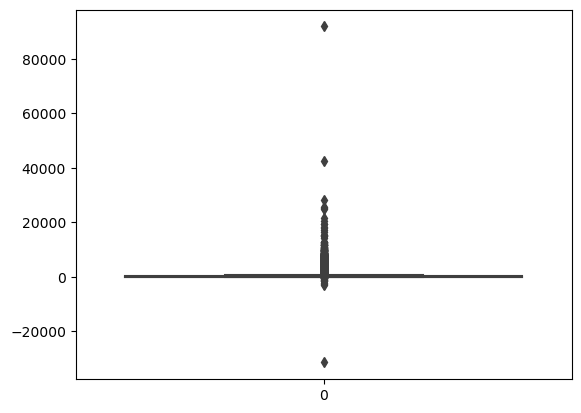

In [147]:
sns.boxplot(df['cb_merch_last_3_month'])

<Axes: >

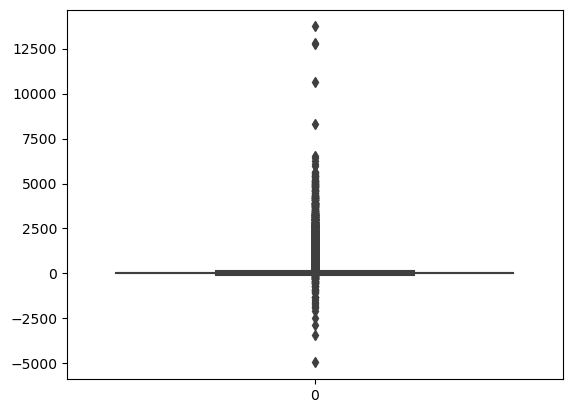

In [148]:
sns.boxplot(df['cb_bank_last_3_month'])

In [149]:
columns = df.columns
columns

Index(['client_id', 'cb_merch_last_3_month', 'cb_bank_last_3_month',
       'cb_merch_before', 'cb_bank_before', 'cnt_communication',
       'cnt_activation', 'cnt_view', 'Air', 'Beauty_shop', 'Book_store',
       'Children', 'Cinema', 'Clothes', 'Electronics', 'Fastfood', 'Fuel',
       'House', 'Jewelry', 'Other', 'Pet_shop', 'Pharmacies', 'Supermarkets',
       'Taxi', 'Transport', 'Air_before', 'Beauty_shop_before',
       'Book_store_before', 'Children_before', 'Cinema_before',
       'Clothes_before', 'Electronics_before', 'Fastfood_before',
       'Fuel_before', 'House_before', 'Jewelry_before', 'Other_before',
       'Pet_shop_before', 'Pharmacies_before', 'Supermarkets_before',
       'Taxi_before', 'Transport_before'],
      dtype='object')

In [150]:
b=0
for element in columns:
    for number in df[element]:
        if number<0:
            b+=1
b

133

In [151]:
df = df.query('cb_merch_last_3_month>=0 and cb_bank_last_3_month>=0 and cb_merch_before>=0 and cb_bank_before>=0 and cnt_communication>=0 and cnt_activation>=0 and cnt_view>=0 and Air>=0 and Beauty_shop>=0 and Book_store>=0 and Children>=0 and Cinema>=0 and Clothes>=0 and Electronics>=0 and Fastfood>=0 and Fuel>=0 and House>=0 and Jewelry>=0')

In [152]:
df = df.query('Other>=0 and Pet_shop>=0 and Pharmacies>=0 and Supermarkets>=0 and Supermarkets>=0 and Taxi>=0 and Transport>=0 and Air_before>=0 and Beauty_shop_before>=0 and Book_store_before>=0 and Children_before>=0  and Cinema_before>=0 and Clothes_before>=0 and Electronics_before>=0 and Fastfood_before>=0 and Fuel_before>=0 and House_before>=0 and Jewelry_before>=0 and Other_before>=0 and Pet_shop_before>=0 and Pharmacies_before>=0 and Supermarkets_before>=0 and Taxi_before>=0 and Transport_before>=0')

In [153]:
df

,client_id,cb_merch_last_3_month,cb_bank_last_3_month,cb_merch_before,cb_bank_before,cnt_communication,cnt_activation,cnt_view,Air,Beauty_shop,...,Fastfood_before,Fuel_before,House_before,Jewelry_before,Other_before,Pet_shop_before,Pharmacies_before,Supermarkets_before,Taxi_before,Transport_before
0,162353149,282.0,141.0,119.0,125.0,6,229,606,0.0,109.0,...,498.0,157.0,2621.0,31.0,6232.0,0.0,91.0,5356.0,0.0,119.0
1,666605735,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,2.0
2,558610079,0.0,0.0,0.0,0.0,0,51,77,2585.0,0.0,...,527.0,398.0,788.0,0.0,9797.0,0.0,1.0,371.0,0.0,458.0
3,769974329,174.0,0.0,151.0,102.0,3,137,375,0.0,0.0,...,227.0,0.0,0.0,0.0,208.0,0.0,14.0,338.0,0.0,10.0
4,350605405,0.0,0.0,179.0,179.0,4,18,24,0.0,634.0,...,452.0,372.0,0.0,76.0,486.0,0.0,499.0,2198.0,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,377949465,0.0,0.0,1275.0,1280.0,3,136,335,0.0,0.0,...,215.0,584.0,59.0,0.0,681.0,0.0,459.0,1034.0,0.0,0.0
49996,299560244,131.0,0.0,2.0,3.0,1,32,65,0.0,0.0,...,9.0,351.0,4.0,25.0,572.0,35.0,50.0,949.0,0.0,0.0
49997,66958117,448.0,0.0,0.0,0.0,1,209,507,14.0,0.0,...,80.0,26.0,0.0,0.0,423.0,0.0,22.0,1006.0,0.0,112.0
49998,549553108,0.0,0.0,244.0,244.0,3,14,21,0.0,66.0,...,653.0,34.0,6.0,0.0,5476.0,15.0,154.0,3715.0,0.0,155.0


In [154]:
df.query('cnt_communication<cnt_activation')

,client_id,cb_merch_last_3_month,cb_bank_last_3_month,cb_merch_before,cb_bank_before,cnt_communication,cnt_activation,cnt_view,Air,Beauty_shop,...,Fastfood_before,Fuel_before,House_before,Jewelry_before,Other_before,Pet_shop_before,Pharmacies_before,Supermarkets_before,Taxi_before,Transport_before
0,162353149,282.0,141.0,119.0,125.0,6,229,606,0.0,109.0,...,498.0,157.0,2621.0,31.0,6232.0,0.0,91.0,5356.0,0.0,119.0
2,558610079,0.0,0.0,0.0,0.0,0,51,77,2585.0,0.0,...,527.0,398.0,788.0,0.0,9797.0,0.0,1.0,371.0,0.0,458.0
3,769974329,174.0,0.0,151.0,102.0,3,137,375,0.0,0.0,...,227.0,0.0,0.0,0.0,208.0,0.0,14.0,338.0,0.0,10.0
4,350605405,0.0,0.0,179.0,179.0,4,18,24,0.0,634.0,...,452.0,372.0,0.0,76.0,486.0,0.0,499.0,2198.0,0.0,14.0
6,278555633,139.0,8.0,0.0,57.0,4,223,607,772.0,98.0,...,431.0,818.0,474.0,0.0,2665.0,15.0,29.0,2033.0,0.0,469.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,377949465,0.0,0.0,1275.0,1280.0,3,136,335,0.0,0.0,...,215.0,584.0,59.0,0.0,681.0,0.0,459.0,1034.0,0.0,0.0
49996,299560244,131.0,0.0,2.0,3.0,1,32,65,0.0,0.0,...,9.0,351.0,4.0,25.0,572.0,35.0,50.0,949.0,0.0,0.0
49997,66958117,448.0,0.0,0.0,0.0,1,209,507,14.0,0.0,...,80.0,26.0,0.0,0.0,423.0,0.0,22.0,1006.0,0.0,112.0
49998,549553108,0.0,0.0,244.0,244.0,3,14,21,0.0,66.0,...,653.0,34.0,6.0,0.0,5476.0,15.0,154.0,3715.0,0.0,155.0


In [155]:
df.query('cnt_activation>cnt_view')

,client_id,cb_merch_last_3_month,cb_bank_last_3_month,cb_merch_before,cb_bank_before,cnt_communication,cnt_activation,cnt_view,Air,Beauty_shop,...,Fastfood_before,Fuel_before,House_before,Jewelry_before,Other_before,Pet_shop_before,Pharmacies_before,Supermarkets_before,Taxi_before,Transport_before
195,752809137,0.0,0.0,350.0,350.0,0,3,2,0.0,0.0,...,15.0,0.0,0.0,0.0,199.0,0.0,18.0,312.0,0.0,0.0
229,363073929,0.0,0.0,120.0,0.0,0,17,14,0.0,56.0,...,809.0,32.0,156.0,0.0,2886.0,6.0,314.0,1311.0,0.0,369.0
399,86693166,0.0,0.0,949.0,904.0,4,18,0,0.0,0.0,...,542.0,739.0,0.0,0.0,13895.0,813.0,455.0,2273.0,0.0,50.0
484,537599225,0.0,0.0,961.0,574.0,0,20,0,0.0,0.0,...,76.0,132.0,20.0,0.0,755.0,0.0,4.0,93.0,0.0,0.0
535,305319299,0.0,0.0,0.0,14.0,0,13,12,0.0,0.0,...,29.0,370.0,0.0,0.0,1754.0,0.0,34.0,1235.0,0.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49255,908961522,3746.0,1249.0,0.0,0.0,0,117,15,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49678,141458822,605.0,440.0,2219.0,2219.0,1,19,9,0.0,0.0,...,987.0,48.0,516.0,0.0,5955.0,0.0,93.0,2026.0,0.0,400.0
49759,265023480,0.0,0.0,186.0,186.0,1,3,2,0.0,0.0,...,134.0,0.0,0.0,0.0,319.0,0.0,0.0,147.0,0.0,0.0
49865,758736815,27.0,48.0,126.0,37.0,2,7,6,0.0,0.0,...,93.0,0.0,0.0,0.0,149.0,0.0,8.0,563.0,0.0,0.0


<Axes: xlabel='cnt_communication', ylabel='cb_bank_last_3_month'>

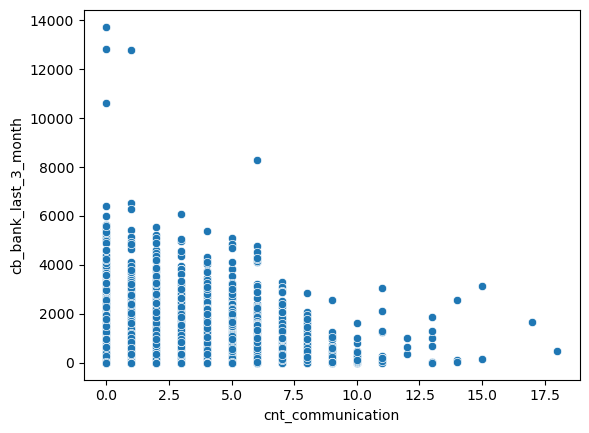

In [156]:
sns.scatterplot(data=df, x='cnt_communication', y='cb_bank_last_3_month')

In [157]:
corr = df.corr()
corr

,client_id,cb_merch_last_3_month,cb_bank_last_3_month,cb_merch_before,cb_bank_before,cnt_communication,cnt_activation,cnt_view,Air,Beauty_shop,...,Fastfood_before,Fuel_before,House_before,Jewelry_before,Other_before,Pet_shop_before,Pharmacies_before,Supermarkets_before,Taxi_before,Transport_before
client_id,1.000000,-0.009597,-0.027159,-0.093976,-0.094707,0.084597,0.053928,0.062851,-0.066811,-0.018771,...,-0.183541,-0.124723,-0.061257,-0.033065,-0.133635,-0.032261,-0.038418,-0.224469,NaN,-0.127154
cb_merch_last_3_month,-0.009597,1.000000,0.674616,0.241620,0.264085,0.068194,0.255164,0.262236,0.031777,0.023899,...,0.056037,0.028698,0.037079,0.009527,0.072979,0.006470,0.013938,0.057284,NaN,0.018015
cb_bank_last_3_month,-0.027159,0.674616,1.000000,0.282634,0.361732,0.082431,0.295124,0.306056,0.038689,0.021570,...,0.066165,0.043720,0.039197,0.011616,0.083650,0.005678,0.016317,0.076229,NaN,0.025072
cb_merch_before,-0.093976,0.241620,0.282634,1.000000,0.720628,0.027207,0.162445,0.154581,0.052915,0.020648,...,0.159386,0.067235,0.117155,0.063757,0.175753,0.036207,0.049730,0.173516,NaN,0.084758
cb_bank_before,-0.094707,0.264085,0.361732,0.720628,1.000000,0.035021,0.195153,0.184378,0.069451,0.017416,...,0.160935,0.077765,0.104518,0.039675,0.151326,0.046250,0.036025,0.175797,NaN,0.089041
cnt_communication,0.084597,0.068194,0.082431,0.027207,0.035021,1.000000,0.185646,0.156429,-0.015957,0.010998,...,-0.000550,0.000682,-0.004801,-0.010674,-0.028793,-0.001911,-0.002666,0.021040,NaN,-0.007016
cnt_activation,0.053928,0.255164,0.295124,0.162445,0.195153,0.185646,1.000000,0.826987,0.013230,0.041667,...,-0.001838,0.033817,0.009381,0.001577,0.013204,0.000675,0.013462,0.068162,NaN,-0.016944
cnt_view,0.062851,0.262236,0.306056,0.154581,0.184378,0.156429,0.826987,1.000000,0.008071,0.035777,...,-0.015472,0.010596,0.002988,-0.000454,0.001131,-0.000734,0.007873,0.022190,NaN,-0.025777
Air,-0.066811,0.031777,0.038689,0.052915,0.069451,-0.015957,0.013230,0.008071,1.000000,0.038430,...,0.167297,0.034356,0.027156,0.041275,0.134116,0.009146,0.024090,0.105372,NaN,0.108020
Beauty_shop,-0.018771,0.023899,0.021570,0.020648,0.017416,0.010998,0.041667,0.035777,0.038430,1.000000,...,0.105576,0.003700,0.014302,0.029686,0.054939,0.015409,0.035557,0.092203,NaN,0.081680


In [3]:
plt.figure(figsize=(35,30))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.3)
plt.show()

NameError: name 'plt' is not defined

# 1. Как взаимосвязаны коммуникации на покупки с кэшбэком?

In [159]:
df.sort_values(by='cnt_communication',ascending=False).head(10)

,client_id,cb_merch_last_3_month,cb_bank_last_3_month,cb_merch_before,cb_bank_before,cnt_communication,cnt_activation,cnt_view,Air,Beauty_shop,...,Fastfood_before,Fuel_before,House_before,Jewelry_before,Other_before,Pet_shop_before,Pharmacies_before,Supermarkets_before,Taxi_before,Transport_before
47513,365659930,0.0,480.0,99.0,4225.0,18,60,140,5559.0,0.0,...,2061.0,0.0,94.0,0.0,1898.0,0.0,563.0,986.0,0.0,586.0
20243,586356903,791.0,1650.0,1284.0,464.0,17,462,4821,0.0,0.0,...,393.0,0.0,3.0,0.0,2291.0,21.0,373.0,1683.0,0.0,0.0
7000,268665189,655.0,3132.0,5863.0,6056.0,15,387,1618,0.0,45.0,...,448.0,2268.0,99.0,1.0,6685.0,0.0,293.0,4099.0,0.0,242.0
43462,858465092,449.0,157.0,0.0,0.0,15,255,804,0.0,105.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,2.0
11528,156224986,6613.0,2584.0,614.0,625.0,14,437,3913,0.0,178.0,...,169.0,680.0,256.0,155.0,1365.0,58.0,246.0,1720.0,0.0,15.0
14840,631835785,2819.0,102.0,417.0,0.0,14,248,1298,0.0,39.0,...,6.0,0.0,0.0,0.0,0.0,28.0,97.0,1498.0,0.0,0.0
43324,369915473,23.0,45.0,483.0,397.0,14,125,280,0.0,0.0,...,699.0,0.0,373.0,0.0,1927.0,217.0,534.0,2917.0,0.0,377.0
5567,312721170,0.0,18.0,92.0,52.0,13,257,617,0.0,0.0,...,1061.0,0.0,279.0,154.0,2345.0,542.0,337.0,3723.0,0.0,2058.0
39286,212360170,4610.0,1859.0,2296.0,2150.0,13,279,1715,0.0,0.0,...,496.0,133.0,60.0,340.0,6753.0,138.0,248.0,4829.0,0.0,62.0
2204,806752544,227.0,701.0,0.0,0.0,13,350,1360,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [160]:
report = df.groupby('cnt_communication').count().reset_index()
report

,cnt_communication,client_id,cb_merch_last_3_month,cb_bank_last_3_month,cb_merch_before,cb_bank_before,cnt_activation,cnt_view,Air,Beauty_shop,...,Fastfood_before,Fuel_before,House_before,Jewelry_before,Other_before,Pet_shop_before,Pharmacies_before,Supermarkets_before,Taxi_before,Transport_before
0,0,17103,17103,17103,17103,17103,17103,17103,17103,17103,...,17103,17103,17103,17103,17103,17103,17103,17103,17103,17103
1,1,9168,9168,9168,9168,9168,9168,9168,9168,9168,...,9168,9168,9168,9168,9168,9168,9168,9168,9168,9168
2,2,9255,9255,9255,9255,9255,9255,9255,9255,9255,...,9255,9255,9255,9255,9255,9255,9255,9255,9255,9255
3,3,6168,6168,6168,6168,6168,6168,6168,6168,6168,...,6168,6168,6168,6168,6168,6168,6168,6168,6168,6168
4,4,3978,3978,3978,3978,3978,3978,3978,3978,3978,...,3978,3978,3978,3978,3978,3978,3978,3978,3978,3978
5,5,2617,2617,2617,2617,2617,2617,2617,2617,2617,...,2617,2617,2617,2617,2617,2617,2617,2617,2617,2617
6,6,1045,1045,1045,1045,1045,1045,1045,1045,1045,...,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045
7,7,324,324,324,324,324,324,324,324,324,...,324,324,324,324,324,324,324,324,324,324
8,8,128,128,128,128,128,128,128,128,128,...,128,128,128,128,128,128,128,128,128,128
9,9,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,49,49,49


<Axes: xlabel='cnt_communication', ylabel='cb_bank_last_3_month'>

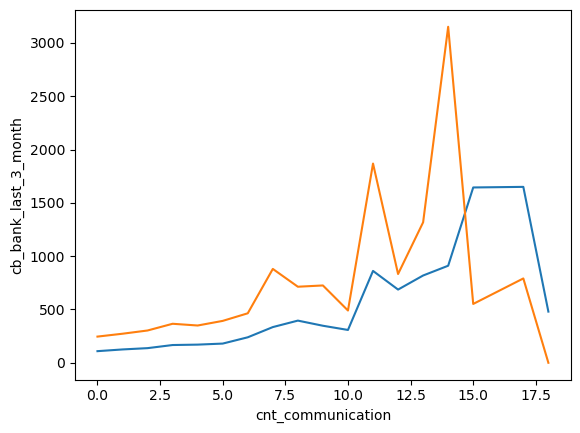

In [161]:
report_1 = df.pivot_table(index='cnt_communication',
                           values=['cb_merch_last_3_month','cb_bank_last_3_month','cb_bank_before','cb_merch_before'],
                          aggfunc='mean')
sns.lineplot(report_1,x='cnt_communication',y='cb_bank_last_3_month')

sns.lineplot(report_1,x='cnt_communication',y='cb_merch_last_3_month')


<Axes: xlabel='cnt_communication', ylabel='cb_bank_before'>

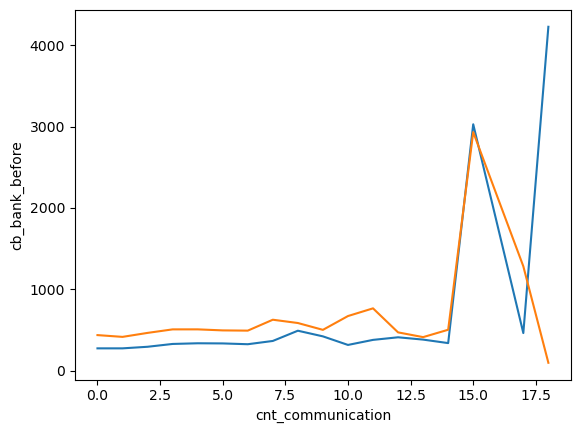

In [162]:
sns.lineplot(report_1,x='cnt_communication',y='cb_bank_before')

sns.lineplot(report_1,x='cnt_communication',y='cb_merch_before')


Рассмотрим влияние коммуникаций на общий объём кэшбека

In [163]:
report_mean = report_1.reset_index()
report_mean

,cnt_communication,cb_bank_before,cb_bank_last_3_month,cb_merch_before,cb_merch_last_3_month
0,0,276.171081,108.994796,438.906917,245.604163
1,1,276.168848,125.083224,417.063809,272.532613
2,2,295.612642,137.321232,465.990167,302.890762
3,3,330.256323,166.503405,509.185960,365.906291
4,4,338.539970,170.340623,509.364756,349.653343
5,5,336.719144,180.118456,496.697363,392.961024
6,6,326.821053,239.034450,493.743541,464.212440
7,7,367.040123,334.799383,627.703704,880.432099
8,8,492.781250,395.570312,587.312500,713.375000
9,9,423.367347,347.346939,503.387755,725.326531


In [164]:
report_spearman_kendal = pd.DataFrame({'cb_bank_before':
                                      [st.spearmanr(report_mean['cnt_communication'],report_mean['cb_bank_before']).statistic,
                                       st.kendalltau(report_mean['cnt_communication'],report_mean['cb_bank_before']).statistic],
                                      'cb_merch_before':
                                      [st.spearmanr(report_mean['cnt_communication'],report_mean['cb_merch_before']).statistic,
                                      st.kendalltau(report_mean['cnt_communication'],report_mean['cb_merch_before']).statistic],
                                       'cb_bank_last_3_month':
                                     [st.spearmanr(report_mean['cnt_communication'],report_mean['cb_bank_last_3_month']).statistic,
                                     st.kendalltau(report_mean['cnt_communication'],report_mean['cb_bank_last_3_month']).statistic],
                                     'cb_merch_last_3_month':
                                     [st.spearmanr(report_mean['cnt_communication'],report_mean['cb_merch_last_3_month']).statistic,
                                     st.kendalltau(report_mean['cnt_communication'],report_mean['cb_merch_last_3_month']).statistic]},
                                     index=['SpearmanR','KendallTau'])
report_spearman_kendal

,cb_bank_before,cb_merch_before,cb_bank_last_3_month,cb_merch_last_3_month
SpearmanR,0.810114,0.265222,0.936017,0.535604
KendallTau,0.633987,0.254902,0.843137,0.503268


In [165]:
corr_matrix_comm = report_mean.corr()
corr_matrix_comm

,cnt_communication,cb_bank_before,cb_bank_last_3_month,cb_merch_before,cb_merch_last_3_month
cnt_communication,1.000000,0.558803,0.788212,0.348101,0.387893
cb_bank_before,0.558803,1.000000,0.340381,0.348863,-0.248338
cb_bank_last_3_month,0.788212,0.340381,1.000000,0.733981,0.402988
cb_merch_before,0.348101,0.348863,0.733981,1.000000,0.016036
cb_merch_last_3_month,0.387893,-0.248338,0.402988,0.016036,1.000000


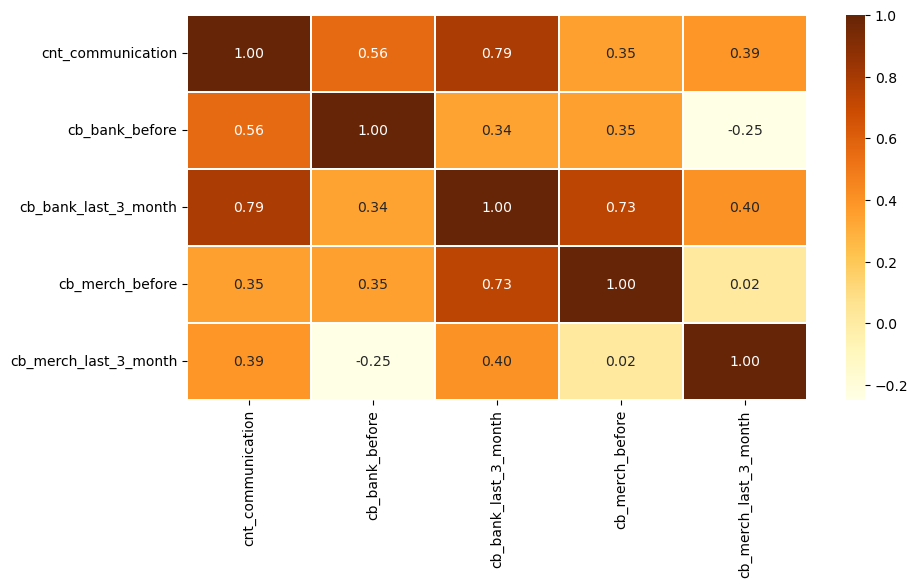

In [166]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix_comm, annot=True, fmt='.2f', cmap='YlOrBr', linewidths=.3)
plt.show()

In [167]:
df_before = pd.DataFrame()

df_before[['client_id', 'cb_merch_before', 'cb_bank_before']] = df[['client_id', 'cb_merch_before', 'cb_bank_before']]

#df_before['total_spending_before'] = sum([df[column] for column in df.columns[25:]])
df_before['monthly_spending_before'] = sum([df[column] for column in df.columns[25:]]) / 7
#df_before['total_cb_before'] = sum([df[column] for column in df.columns[3:5]])
df_before['monthly_cb_before'] = sum([df[column] for column in df.columns[3:5]]) / 7

#df_before['cb_perc_before'] = df_before['total_cb_before'] / df_before['total_spending_before']

df_before['cnt_communication'] = df['cnt_communication']

df_before.head(5)

,client_id,cb_merch_before,cb_bank_before,monthly_spending_before,monthly_cb_before,cnt_communication
0,162353149,119.0,125.0,2400.000000,34.857143,6
1,666605735,0.0,0.0,2.000000,0.000000,0
2,558610079,0.0,0.0,1782.000000,0.000000,0
3,769974329,151.0,102.0,129.142857,36.142857,3
4,350605405,179.0,179.0,641.285714,51.142857,4


In [168]:
report_before = df_before.pivot_table(index='cnt_communication',values='monthly_spending_before',aggfunc='mean').reset_index()
report_before.corr()

,cnt_communication,monthly_spending_before
cnt_communication,1.00000,-0.46364
monthly_spending_before,-0.46364,1.00000


In [169]:
st.spearmanr(report_before['cnt_communication'],report_before['monthly_spending_before']).statistic

-0.5314757481940144

In [170]:
st.kendalltau(report_before['cnt_communication'],report_before['monthly_spending_before']).statistic

-0.411764705882353

In [171]:
df_after = pd.DataFrame()

df_after[['client_id', 'cb_merch', 'cb_bank']] = df[['client_id', 'cb_merch_last_3_month', 'cb_bank_last_3_month']]

#df_after['total_spending'] = sum([df[column] for column in df.columns[8:24]])
df_after['monthly_spending'] = sum([df[column] for column in df.columns[8:24]]) / 3
#df_after['total_cb'] = sum([df[column] for column in df.columns[1:3]])
df_after['monthly_cb'] = sum([df[column] for column in df.columns[1:3]]) / 3

#df_after['cb_perc'] = df_after['total_cb'] / df_after['total_spending']

df_after['cnt_communication'] = df['cnt_communication']

df_after.head(5)

,client_id,cb_merch,cb_bank,monthly_spending,monthly_cb,cnt_communication
0,162353149,282.0,141.0,4244.333333,141.0,6
1,666605735,0.0,0.0,0.000000,0.0,0
2,558610079,0.0,0.0,2989.666667,0.0,0
3,769974329,174.0,0.0,388.000000,58.0,3
4,350605405,0.0,0.0,2569.000000,0.0,4


In [172]:
report_after = df_after.pivot_table(index='cnt_communication',values='monthly_spending',aggfunc='mean').reset_index()
report_after.corr()

,cnt_communication,monthly_spending
cnt_communication,1.00000,0.55257
monthly_spending,0.55257,1.00000


In [173]:
st.spearmanr(report_after['cnt_communication'],report_after['monthly_spending']).statistic

0.5500515995872033

In [174]:
st.kendalltau(report_after['cnt_communication'],report_after['monthly_spending']).statistic

0.46405228758169936

Отметим следующее: связь между количеством отправленных коммуникаций и общими затратами является заметной и до и после. Стоит сказать, что после введённых изменений связь между ежемесячными затратами и количеством уведомлений поменяла своё направление на положительное. В случае же рассмотрения связи между объёмом кэшбека и числом отправленных коммуникаций мы приходим к неоднозначному выводу: относительно объёма кэшбека со стороны банков сила связи изменилась со средней до высокой. В случае объёма кэшбека со стороны фирм связь особо не изменила свою силу и осталось слабой. 


# 2. Как взаимосвязаны обороты клиентов и выплаченный кэшбэк?

In [175]:
df_after.query('100 < monthly_spending < 10000').describe()

,client_id,cb_merch,cb_bank,monthly_spending,monthly_cb,cnt_communication
count,4.263300e+04,42633.000000,42633.000000,42633.000000,42633.000000,42633.000000
mean,4.485057e+08,308.003612,142.422888,2595.231003,150.142167,1.875472
std,2.391190e+08,900.357332,416.559585,2071.248171,410.523855,1.773324
min,1.009660e+05,0.000000,0.000000,100.333333,0.000000,0.000000
25%,2.563912e+08,0.000000,0.000000,1018.333333,0.000000,0.000000
50%,3.962839e+08,8.000000,0.000000,2044.333333,8.000000,2.000000
75%,6.531322e+08,217.000000,77.000000,3614.000000,104.333333,3.000000
max,9.413153e+08,42430.000000,13731.000000,9995.666667,14143.333333,18.000000


In [176]:
df_before.query('100 < monthly_spending_before < 10000').describe()

,client_id,cb_merch_before,cb_bank_before,monthly_spending_before,monthly_cb_before,cnt_communication
count,4.415400e+04,44154.000000,44154.000000,44154.000000,44154.000000,44154.000000
mean,4.319774e+08,503.206957,325.777347,1159.215994,118.426329,1.756602
std,2.327340e+08,1197.046936,789.040520,1123.122702,263.807985,1.735697
min,1.009660e+05,0.000000,0.000000,100.142857,0.000000,0.000000
25%,2.489392e+08,0.000000,0.000000,432.142857,3.285714,0.000000
50%,3.865316e+08,113.000000,47.000000,828.357143,28.714286,1.000000
75%,6.296980e+08,405.000000,243.000000,1478.535714,96.142857,3.000000
max,9.413153e+08,30274.000000,18656.000000,9951.428571,5409.428571,18.000000


In [177]:
df_before.corr()

,client_id,cb_merch_before,cb_bank_before,monthly_spending_before,monthly_cb_before,cnt_communication
client_id,1.000000,-0.093976,-0.094707,-0.195388,-0.101281,0.084597
cb_merch_before,-0.093976,1.000000,0.720628,0.224773,0.955338,0.027207
cb_bank_before,-0.094707,0.720628,1.000000,0.202458,0.893331,0.035021
monthly_spending_before,-0.195388,0.224773,0.202458,1.000000,0.231988,-0.024015
monthly_cb_before,-0.101281,0.955338,0.893331,0.231988,1.000000,0.032562
cnt_communication,0.084597,0.027207,0.035021,-0.024015,0.032562,1.000000


In [178]:
df_after.corr()

,client_id,cb_merch,cb_bank,monthly_spending,monthly_cb,cnt_communication
client_id,1.000000,-0.009597,-0.027159,-0.155746,-0.015945,0.084597
cb_merch,-0.009597,1.000000,0.674616,0.202858,0.971700,0.068194
cb_bank,-0.027159,0.674616,1.000000,0.200737,0.829894,0.082431
monthly_spending,-0.155746,0.202858,0.200737,1.000000,0.217561,0.025793
monthly_cb,-0.015945,0.971700,0.829894,0.217561,1.000000,0.077920
cnt_communication,0.084597,0.068194,0.082431,0.025793,0.077920,1.000000


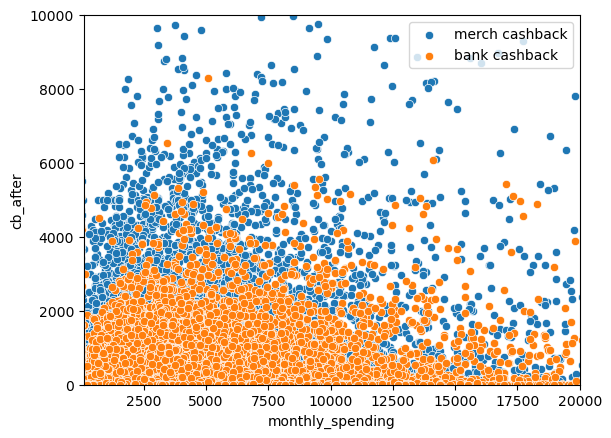

In [179]:
sns.scatterplot(data=df_after, x='monthly_spending', y='cb_merch', label='merch cashback')
sns.scatterplot(data=df_after, x='monthly_spending', y='cb_bank', label='bank cashback')

plt.xlim((100,20000))
plt.ylim((0, 10000))

plt.ylabel('cb_after')

plt.show()

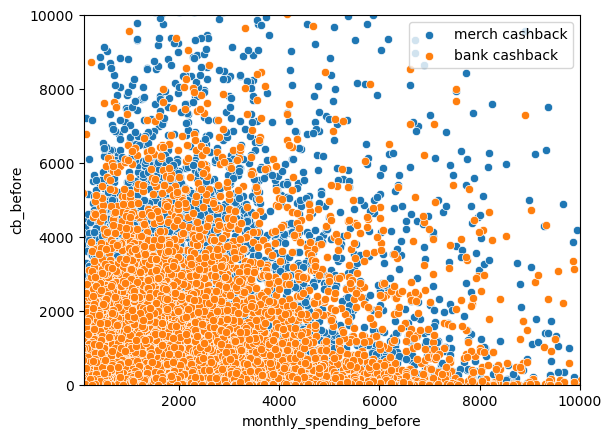

In [180]:
sns.scatterplot(data=df_before, x='monthly_spending_before', y='cb_merch_before', label='merch cashback')
sns.scatterplot(data=df_before, x='monthly_spending_before', y='cb_bank_before', label='bank cashback')

plt.xlim((100,10000))
plt.ylim((0,10000))

plt.ylabel('cb_before')

plt.show()

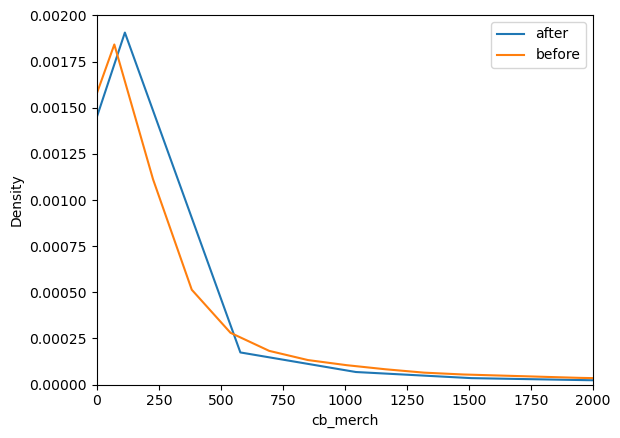

In [181]:
sns.kdeplot(data=df_after, x='cb_merch', label='after')
sns.kdeplot(data=df_before, x='cb_merch_before', label='before')

plt.xlim((0, 2000))

plt.legend()

plt.show()

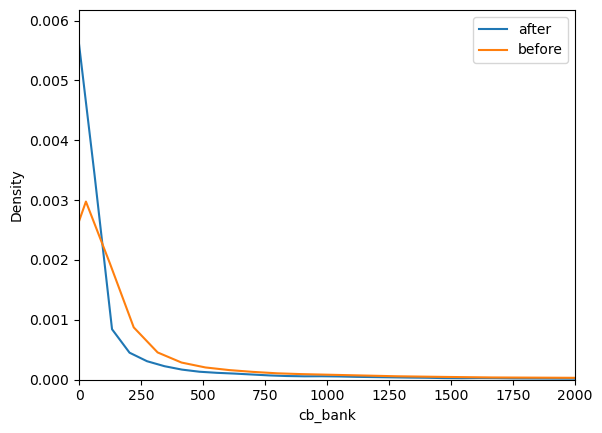

In [182]:
sns.kdeplot(data=df_after, x='cb_bank', label='after')
sns.kdeplot(data=df_before, x='cb_bank_before', label='before')

plt.xlim((0, 2000))

plt.legend()

plt.show()

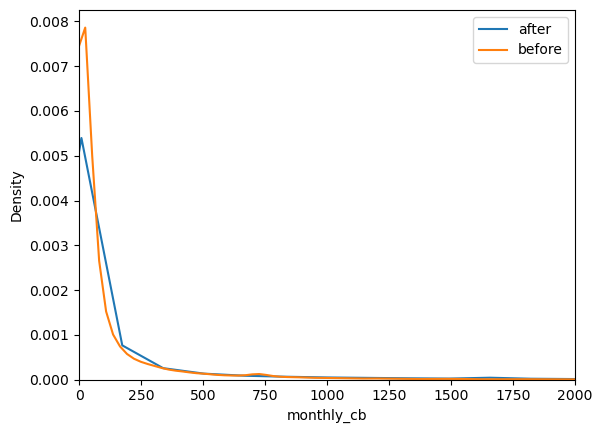

In [183]:
sns.kdeplot(data=df_after, x='monthly_cb', label='after')
sns.kdeplot(data=df_before, x='monthly_cb_before', label='before')

plt.xlim((0, 2000))

plt.legend()

plt.show()

In [184]:
df_before_clean = df_before.query('0 < monthly_spending_before < 10000')
df_before_clean['monthly_spending_cut'] = pd.cut(df_before_clean['monthly_spending_before'], bins=20, labels=range(250, 10000, 500))

report_mean_cb_before = df_before_clean.pivot_table(
    index='monthly_spending_cut',
    values=['monthly_cb_before'],
    aggfunc=['mean', 'count']
)

report_mean_cb_before

,mean,count
,monthly_cb_before,monthly_cb_before
monthly_spending_cut,,
250,45.886276,17035
750,84.629603,12654
1250,121.897387,7561
1750,177.244850,4272
2250,210.333836,2369
2750,237.357697,1419
3250,281.440662,898
3750,321.639055,526


In [185]:
df_after_clean = df_after.query('0 < monthly_spending < 10000')
df_after_clean['monthly_spending_cut'] = pd.cut(df_after_clean['monthly_spending'], bins=20, labels=range(250, 10000, 500))

report_mean_cb = df_after_clean.pivot_table(
    index='monthly_spending_cut',
    values=['monthly_cb'],
    aggfunc=['mean', 'count']
)

report_mean_cb

,mean,count
,monthly_cb,monthly_cb
monthly_spending_cut,,
250,31.526808,7162
750,72.663369,5559
1250,94.432380,5452
1750,113.335317,5041
2250,135.898873,4140
2750,156.628646,3428
3250,185.998172,2918
3750,205.546090,2242


<Axes: xlabel='monthly_spending_cut'>

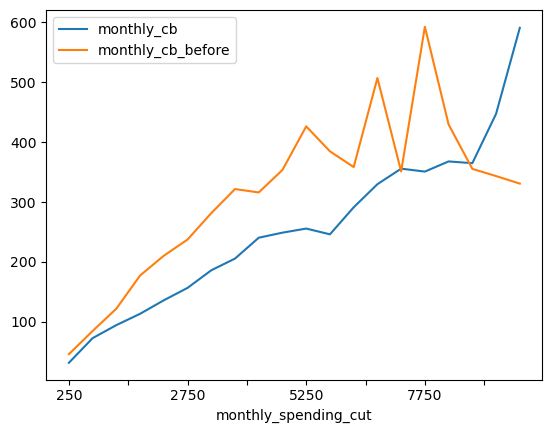

In [186]:
c = report_mean_cb.merge(report_mean_cb_before, on='monthly_spending_cut')
c['mean'].plot()

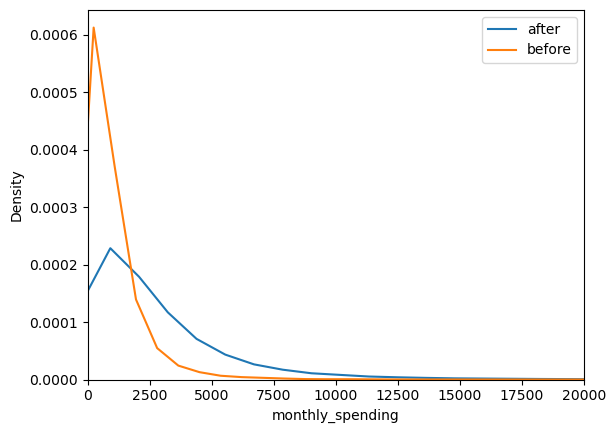

In [187]:
sns.kdeplot(data=df_after, x='monthly_spending', label='after')
sns.kdeplot(data=df_before, x='monthly_spending_before', label='before')

plt.xlim((0, 20000))

plt.legend()

plt.show()

Исходя из представленных инфографиков сделаем соответствующие выводы:
1. Оборот клиентов практически не связан с объёмом кэшбека, исходя из графика scatter_plot и матрицы корреляций
2. Большая часть клиентов имеют кэшбек меньше 250 единиц
3. Общий объёмом кэшбека увеличился после введния соответствующих мер
4. Изменилось также и распределение объёма кэшбека между клиентами: после введения изменений общее число акторов, использующих кэшбек увеличилось, но снизилось значение кэшбека, которое есть у большинства клиентов

# 3. 3 месяца назад произшло глобальное обновление приложения в т.ч. методики взаимодействия с пользователем. Необходимо оценить эффект обновления.

In [188]:
df_before_clean

,client_id,cb_merch_before,cb_bank_before,monthly_spending_before,monthly_cb_before,cnt_communication,monthly_spending_cut
0,162353149,119.0,125.0,2400.000000,34.857143,6,2250
1,666605735,0.0,0.0,2.000000,0.000000,0,250
2,558610079,0.0,0.0,1782.000000,0.000000,0,1750
3,769974329,151.0,102.0,129.142857,36.142857,3,250
4,350605405,179.0,179.0,641.285714,51.142857,4,750
...,...,...,...,...,...,...,...
49995,377949465,1275.0,1280.0,599.428571,365.000000,3,750
49996,299560244,2.0,3.0,333.285714,0.714286,1,250
49997,66958117,0.0,0.0,265.857143,0.000000,1,250
49998,549553108,244.0,244.0,1849.857143,69.714286,3,1750


In [189]:
df_after_clean

,client_id,cb_merch,cb_bank,monthly_spending,monthly_cb,cnt_communication,monthly_spending_cut
0,162353149,282.0,141.0,4244.333333,141.000000,6,4250
2,558610079,0.0,0.0,2989.666667,0.000000,0,2750
3,769974329,174.0,0.0,388.000000,58.000000,3,250
4,350605405,0.0,0.0,2569.000000,0.000000,4,2750
5,687443957,0.0,0.0,4.333333,0.000000,2,250
...,...,...,...,...,...,...,...
49995,377949465,0.0,0.0,6395.333333,0.000000,3,6250
49996,299560244,131.0,0.0,1094.000000,43.666667,1,1250
49997,66958117,448.0,0.0,1251.333333,149.333333,1,1250
49998,549553108,0.0,0.0,5752.333333,0.000000,3,5750


In [190]:
df_compare = df_before_clean.merge(df_after_clean,how='inner',on='client_id')
df_compare

,client_id,cb_merch_before,cb_bank_before,monthly_spending_before,monthly_cb_before,cnt_communication_x,monthly_spending_cut_x,cb_merch,cb_bank,monthly_spending,monthly_cb,cnt_communication_y,monthly_spending_cut_y
0,162353149,119.0,125.0,2400.000000,34.857143,6,2250,282.0,141.0,4244.333333,141.000000,6,4250
1,558610079,0.0,0.0,1782.000000,0.000000,0,1750,0.0,0.0,2989.666667,0.000000,0,2750
2,769974329,151.0,102.0,129.142857,36.142857,3,250,174.0,0.0,388.000000,58.000000,3,250
3,350605405,179.0,179.0,641.285714,51.142857,4,750,0.0,0.0,2569.000000,0.000000,4,2750
4,687443957,0.0,0.0,247.857143,0.000000,2,250,0.0,0.0,4.333333,0.000000,2,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44064,377949465,1275.0,1280.0,599.428571,365.000000,3,750,0.0,0.0,6395.333333,0.000000,3,6250
44065,299560244,2.0,3.0,333.285714,0.714286,1,250,131.0,0.0,1094.000000,43.666667,1,1250
44066,66958117,0.0,0.0,265.857143,0.000000,1,250,448.0,0.0,1251.333333,149.333333,1,1250
44067,549553108,244.0,244.0,1849.857143,69.714286,3,1750,0.0,0.0,5752.333333,0.000000,3,5750


<Axes: >

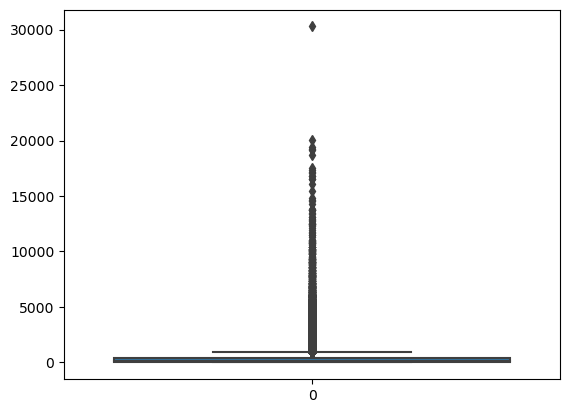

In [191]:

sns.boxplot(df_compare['cb_merch_before'])

<Axes: >

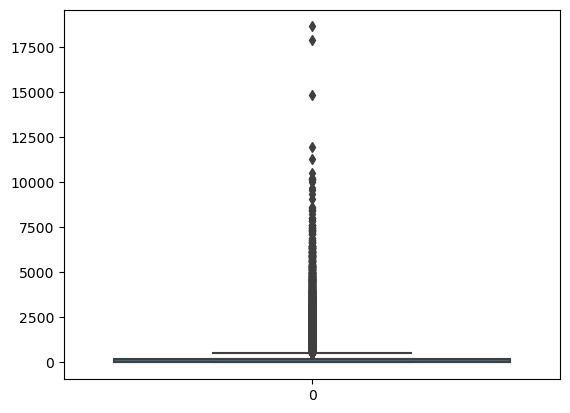

In [192]:
sns.boxplot(df_compare['cb_bank_before'])

In [193]:
df_compare = df_compare.query('cb_bank_before<10000')

<Axes: >

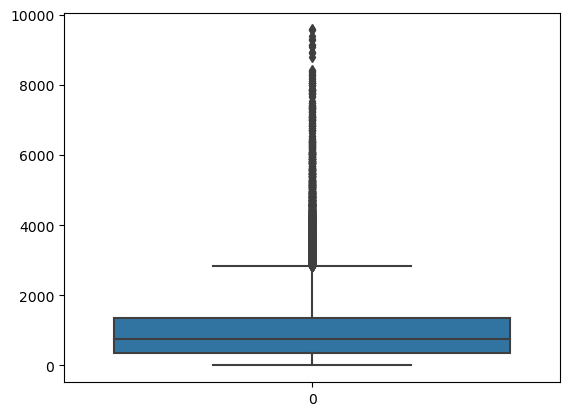

In [194]:
sns.boxplot(df_compare['monthly_spending_before'])

In [195]:
df_compare = df_compare.query('monthly_spending_before<8000')

<Axes: >

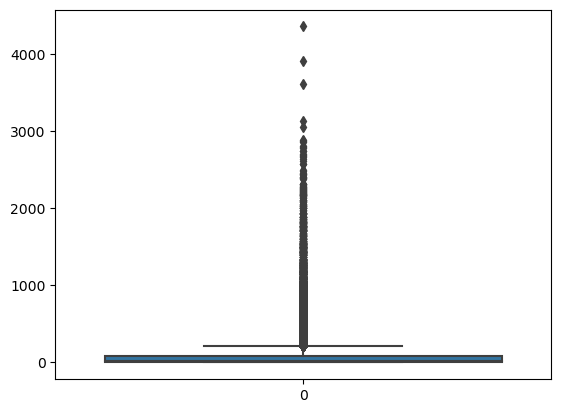

In [196]:
sns.boxplot(df_compare['monthly_cb_before'])

In [197]:
df_compare = df_compare.query('monthly_cb_before<3000')

<Axes: >

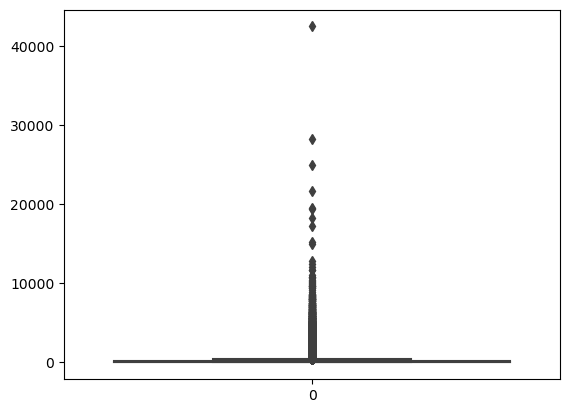

In [198]:
sns.boxplot(df_compare['cb_merch'])

In [199]:
df_compare = df_compare.query('cb_merch<10000')

<Axes: >

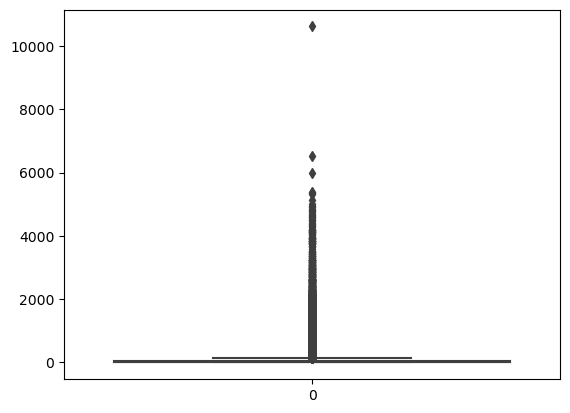

In [200]:
sns.boxplot(df_compare['cb_bank'])

In [201]:
df_compare = df_compare.query('cb_bank<6000')

<Axes: >

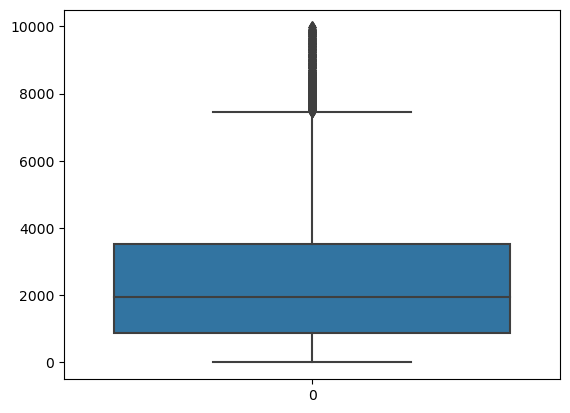

In [202]:
sns.boxplot(df_compare['monthly_spending'])

<Axes: >

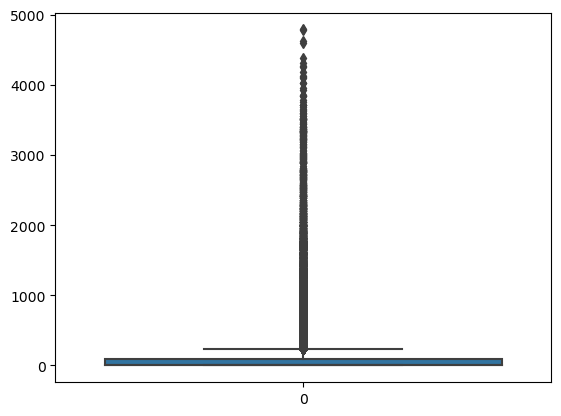

In [203]:
sns.boxplot(df_compare['monthly_cb'])

In [204]:
df_compare = df_compare.query('monthly_cb<4000')

In [205]:
df_compare

,client_id,cb_merch_before,cb_bank_before,monthly_spending_before,monthly_cb_before,cnt_communication_x,monthly_spending_cut_x,cb_merch,cb_bank,monthly_spending,monthly_cb,cnt_communication_y,monthly_spending_cut_y
0,162353149,119.0,125.0,2400.000000,34.857143,6,2250,282.0,141.0,4244.333333,141.000000,6,4250
1,558610079,0.0,0.0,1782.000000,0.000000,0,1750,0.0,0.0,2989.666667,0.000000,0,2750
2,769974329,151.0,102.0,129.142857,36.142857,3,250,174.0,0.0,388.000000,58.000000,3,250
3,350605405,179.0,179.0,641.285714,51.142857,4,750,0.0,0.0,2569.000000,0.000000,4,2750
4,687443957,0.0,0.0,247.857143,0.000000,2,250,0.0,0.0,4.333333,0.000000,2,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44064,377949465,1275.0,1280.0,599.428571,365.000000,3,750,0.0,0.0,6395.333333,0.000000,3,6250
44065,299560244,2.0,3.0,333.285714,0.714286,1,250,131.0,0.0,1094.000000,43.666667,1,1250
44066,66958117,0.0,0.0,265.857143,0.000000,1,250,448.0,0.0,1251.333333,149.333333,1,1250
44067,549553108,244.0,244.0,1849.857143,69.714286,3,1750,0.0,0.0,5752.333333,0.000000,3,5750


In [206]:
# Разделить данные на бакеты
buckets = pd.qcut(df_compare['client_id'],15)
cb_merch_before=[]
cb_bank_before=[]
monthly_spending_before=[]
monthly_cb_before=[]

cb_merch=[]
cb_bank=[]
monthly_spending=[]
monthly_cb=[]

for bucket in buckets.unique():
    cb_merch_before.append(df_compare['cb_merch_before'][buckets == bucket].describe().mean())

for bucket in buckets.unique():
    cb_bank_before.append(df_compare['cb_bank_before'][buckets == bucket].describe().mean())
    
for bucket in buckets.unique():
    monthly_spending_before.append(df_compare['monthly_spending_before'][buckets == bucket].describe().mean())
    
for bucket in buckets.unique():
    monthly_cb_before.append(df_compare['monthly_cb_before'][buckets == bucket].describe().mean())
    
for bucket in buckets.unique():
    cb_merch.append(df_compare['cb_merch'][buckets == bucket].describe().mean())
    
for bucket in buckets.unique():
    cb_bank.append(df_compare['cb_bank'][buckets == bucket].describe().mean())
    
for bucket in buckets.unique():
    monthly_spending.append(df_compare['monthly_spending'][buckets == bucket].describe().mean())
    
for bucket in buckets.unique():
    monthly_cb.append(df_compare['monthly_cb'][buckets == bucket].describe().mean()) 

In [207]:
groups =[cb_merch_before,cb_bank_before,monthly_spending_before,monthly_cb_before,cb_merch,cb_bank,monthly_spending,monthly_cb]

In [208]:
def shapiro_test(a):
    b = st.shapiro(a).pvalue
    return(b)

In [209]:
for element in groups:
    if shapiro_test(element)<0.05:
        print(shapiro_test(element),f'Отвергаем нулевую гипотезу. Выборка не имеет нормального распределения')
    else:
        print(shapiro_test(element),f'Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение')

0.8338127732276917 Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение
0.21447621285915375 Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение
0.5490891933441162 Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение
0.10370796173810959 Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение
0.09960182011127472 Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение
0.14255964756011963 Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение
0.16577889025211334 Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение
0.9839709997177124 Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение


In [210]:
def ttest_rel_f(a,b):
    c = st.ttest_rel(a,b).pvalue
    return c

In [211]:
for i in range(4):
    result = ttest_rel_f(groups[i],groups[i+4])
    if result<0.05:
        print('отвергаем нулевую гипотезу о равенстве средних')
    else:
        print('принимаем нулевую гипотезу')

отвергаем нулевую гипотезу о равенстве средних
отвергаем нулевую гипотезу о равенстве средних
отвергаем нулевую гипотезу о равенстве средних
отвергаем нулевую гипотезу о равенстве средних


In [212]:
for i in range(4):
    if sum(groups[i])/len(groups[i])<sum(groups[i+4])/len(groups[i+4]):
        print('Изменения увеличили показатель')
    elif sum(groups[i])/len(groups[i])>sum(groups[i+4])/len(groups[i+4]):
        print('Изменения уменьшили показатель')

Изменения уменьшили показатель
Изменения уменьшили показатель
Изменения увеличили показатель
Изменения увеличили показатель


На основе проверки гипотез о равенстве средних было выявлено следующее:
1. Проведённые изменения внесли значимые изменения в структуру кэшбека
2. На общий объём кэшбека банков и организаций мера повлияла отрицательно
3. На общее число затрат и месячный кэшбек изменения повлияли в лучшую для банка сторону

4. Выдвините собственную гипотезу на основе имеющихся данных.

Предположим, что кэшбек от банков значительно превосходит кэшбек от организаций. Проверим, так ли это на самом деле:

In [228]:
def mwh(a,b):
    c = st.mannwhitneyu(a,b).pvalue
    if c<0.05:
        print('Отвергаем нулевую гипотезу о равенстве средних')
    else:
        print('Принимаем нулевую гипотезу о равенстве средних')
        
    

In [229]:
mwh(df_compare['cb_bank_before'],df_compare['cb_merch_before'])

Отвергаем нулевую гипотезу о равенстве средних


In [230]:
df_compare['cb_bank_before'].mean()<df_compare['cb_merch_before'].mean()

True

In [231]:
mwh(df_compare['cb_bank'],df_compare['cb_merch'])

Отвергаем нулевую гипотезу о равенстве средних


In [232]:
df_compare['cb_bank'].mean()<df_compare['cb_merch'].mean()

True

Таким образом, можно сделать вывод, что гипотеза о большей популярности кэшбека со стороны банков была опровержена.